In [1]:
# Run in python console
import nltk

### 预处理

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords

In [4]:
df = pd.read_excel("C:/Users/onrik\\report\\0203_LDA\\개인정보보호법 twitter 가공_날짜 가공.xlsx")
df.columns = ['x','date1','content','date2']
df = df[['date2','content']]
df

,date2,content
0,2020-02-01,엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...
1,2020-02-03,“개인정보보호법학회 학술세미나 &lt;데이터 3법의 개정과 향후 입법과제 모색&gt...
2,2020-02-03,일단 5번은 성적인내용이므로 사이버성폭력에 해당되고 5-1번은 협박에 응하지않을시 ...
3,2020-02-03,"6년 전 박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이, 유럽 개..."
4,2020-02-03,"한국의 개인정보보호, 유럽연합 인정 받을까?: 지난달 9일 국회가 개인정보보호법, ..."
...,...,...
2147,2021-12-29,"“중범죄가 확정적인 후보.”\n\n직권남용권리행사방해, 공무상 비밀누설, 개인정보보..."
2148,2021-12-30,'재판부가 어떤 성향인지 분석한 문건은 개인정보보호법을 위반해서 수집된 정보를 토대...
2149,2021-12-30,진짜 매니저다 -> 개인정보보호법 위반\n허언증이다 -> 허위 사실 유포 + 명예 훼손
2150,2021-12-30,아침부터...\n팀장님한태 책임자 통화 넘겼어\n진짜 시러.\n그것도 별거 없는 이...


In [5]:
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

df['content가공2'] = ''
for i in range(len(df)):
    df.at[i,'content가공2'] = ' '.join(x for x in data_words[i])
df

,date2,content,content가공2
0,2020-02-01,엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...,엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...
1,2020-02-03,“개인정보보호법학회 학술세미나 &lt;데이터 3법의 개정과 향후 입법과제 모색&gt...,개인정보보호법학회 학술세미나 lt 데이터 법의 개정과 향후 입법과제 모색 gt 모임...
2,2020-02-03,일단 5번은 성적인내용이므로 사이버성폭력에 해당되고 5-1번은 협박에 응하지않을시 ...,일단 번은 성적인내용이므로 사이버성폭력에 해당되고 번은 협박에 응하지않을시 개인정보...
3,2020-02-03,"6년 전 박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이, 유럽 개...",박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이 유럽 개인정보보호법...
4,2020-02-03,"한국의 개인정보보호, 유럽연합 인정 받을까?: 지난달 9일 국회가 개인정보보호법, ...",한국의 개인정보보호 유럽연합 인정 받을까 지난달 국회가 개인정보보호법 정보통신망법 ...
...,...,...,...
2147,2021-12-29,"“중범죄가 확정적인 후보.”\n\n직권남용권리행사방해, 공무상 비밀누설, 개인정보보...",중범죄가 확정적인 후보 직권남용권리행사방해 공무상 비밀누설 개인정보보호법 위반 공직...
2148,2021-12-30,'재판부가 어떤 성향인지 분석한 문건은 개인정보보호법을 위반해서 수집된 정보를 토대...,재판부가 어떤 성향인지 분석한 문건은 개인정보보호법을 위반해서 수집된 정보를 토대로...
2149,2021-12-30,진짜 매니저다 -> 개인정보보호법 위반\n허언증이다 -> 허위 사실 유포 + 명예 훼손,진짜 매니저다 개인정보보호법 위반 허언증이다 허위 사실 유포 명예 훼손
2150,2021-12-30,아침부터...\n팀장님한태 책임자 통화 넘겼어\n진짜 시러.\n그것도 별거 없는 이...,아침부터 팀장님한태 책임자 통화 넘겼어 진짜 시러 그것도 별거 없는 이유로 고객의 ...


In [6]:
from konlpy.tag import Okt
okt = Okt()
cols = ['content가공2']
for i in range(len(df)):
    for col in cols:
        content_all = df.loc[i,col]
        morphs_txt = okt.pos(content_all,stem=True)
        df.at[i,col] = morphs_txt

resultdf = df
resultdf

,date2,content,content가공2
0,2020-02-01,엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...,"[(엥우님, Noun), (개인정보보호법, Noun), (으로, Josa), (사진..."
1,2020-02-03,“개인정보보호법학회 학술세미나 &lt;데이터 3법의 개정과 향후 입법과제 모색&gt...,"[(개인정보보호법, Noun), (학회, Noun), (학술, Noun), (세미나..."
2,2020-02-03,일단 5번은 성적인내용이므로 사이버성폭력에 해당되고 5-1번은 협박에 응하지않을시 ...,"[(일단, Noun), (번은, Noun), (성적, Noun), (인, Josa)..."
3,2020-02-03,"6년 전 박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이, 유럽 개...","[(박근혜, Noun), (정부, Noun), (의, Josa), (창조, Noun..."
4,2020-02-03,"한국의 개인정보보호, 유럽연합 인정 받을까?: 지난달 9일 국회가 개인정보보호법, ...","[(한국, Noun), (의, Josa), (개인, Noun), (정보보호, Nou..."
...,...,...,...
2147,2021-12-29,"“중범죄가 확정적인 후보.”\n\n직권남용권리행사방해, 공무상 비밀누설, 개인정보보...","[(중범죄, Noun), (가, Josa), (확정, Noun), (적, Suffi..."
2148,2021-12-30,'재판부가 어떤 성향인지 분석한 문건은 개인정보보호법을 위반해서 수집된 정보를 토대...,"[(재판, Noun), (부가, Noun), (어떻다, Adjective), (성향..."
2149,2021-12-30,진짜 매니저다 -> 개인정보보호법 위반\n허언증이다 -> 허위 사실 유포 + 명예 훼손,"[(진짜, Noun), (매니저, Noun), (다, Josa), (개인정보보호법,..."
2150,2021-12-30,아침부터...\n팀장님한태 책임자 통화 넘겼어\n진짜 시러.\n그것도 별거 없는 이...,"[(아침, Noun), (부터, Josa), (팀, Noun), (장님, Noun)..."


In [7]:
for i in range(len(resultdf)):
    for col in cols:
        lls = []
        if len(resultdf.loc[i,col]) == 0:
            pass
        else:
            for j in range(len(resultdf.loc[i,col])):
                if resultdf.loc[i,col][j][1] in ['Noun','Hashtag','Adjective']:
                    if resultdf.loc[i,col][j][1] == 'Hashtag':
                        lls.append((resultdf.loc[i,col][j][0].split('#')[-1],resultdf.loc[i,col][j][1]))
                    else:
                        lls.append(resultdf.loc[i,col][j])
            resultdf.at[i,col] = lls
resultdf

,date2,content,content가공2
0,2020-02-01,엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...,"[(엥우님, Noun), (개인정보보호법, Noun), (사진, Noun), (도용..."
1,2020-02-03,“개인정보보호법학회 학술세미나 &lt;데이터 3법의 개정과 향후 입법과제 모색&gt...,"[(개인정보보호법, Noun), (학회, Noun), (학술, Noun), (세미나..."
2,2020-02-03,일단 5번은 성적인내용이므로 사이버성폭력에 해당되고 5-1번은 협박에 응하지않을시 ...,"[(일단, Noun), (번은, Noun), (성적, Noun), (용이, Noun..."
3,2020-02-03,"6년 전 박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이, 유럽 개...","[(박근혜, Noun), (정부, Noun), (창조, Noun), (경제정책, N..."
4,2020-02-03,"한국의 개인정보보호, 유럽연합 인정 받을까?: 지난달 9일 국회가 개인정보보호법, ...","[(한국, Noun), (개인, Noun), (정보보호, Noun), (유럽연합, ..."
...,...,...,...
2147,2021-12-29,"“중범죄가 확정적인 후보.”\n\n직권남용권리행사방해, 공무상 비밀누설, 개인정보보...","[(중범죄, Noun), (확정, Noun), (후보, Noun), (직권남용, N..."
2148,2021-12-30,'재판부가 어떤 성향인지 분석한 문건은 개인정보보호법을 위반해서 수집된 정보를 토대...,"[(재판, Noun), (부가, Noun), (어떻다, Adjective), (성향..."
2149,2021-12-30,진짜 매니저다 -> 개인정보보호법 위반\n허언증이다 -> 허위 사실 유포 + 명예 훼손,"[(진짜, Noun), (매니저, Noun), (개인정보보호법, Noun), (위반..."
2150,2021-12-30,아침부터...\n팀장님한태 책임자 통화 넘겼어\n진짜 시러.\n그것도 별거 없는 이...,"[(아침, Noun), (팀, Noun), (장님, Noun), (태, Noun),..."


In [8]:
k_stopword = pd.read_csv("korean_stopword_0317.csv")
k_stopword = list(k_stopword['불용어'])
k_stopword.append('트윗')
k_stopword.append('인용')
for i in range(len(resultdf)):
    for col in cols:
        newlst = []
        for word in resultdf.loc[i,col]:
            if word[0] not in k_stopword:
                newlst.append(word)
        resultdf.at[i,col] = newlst
ldadf = resultdf

In [9]:
for col in cols:
    resultdf[col + 'bigram'] = ''

for i in range(len(resultdf)):
    for col in cols:
        newlst = resultdf.loc[i,col]
        if len(newlst) == 0 or len(newlst) == 1:
            pass
        else:
            bigram = [newlst[0][0] + '_' + newlst[1][0]]
            if len(newlst) == 2:
                resultdf.at[i,col+'bigram'] = bigram
            else:
                for j in range(2,len(newlst)):
                    biword = newlst[j-1][0] + '_' + newlst[j][0]
                    triword = newlst[j-2][0] + '_' + newlst[j-1][0] + '_' + newlst[j][0]
                    bigram.append(biword)
                resultdf.at[i,col+'bigram'] = bigram
resultdf

,date2,content,content가공2,content가공2bigram
0,2020-02-01,엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...,"[(엥우님, Noun), (개인정보보호법, Noun), (사진, Noun), (도용...","[엥우님_개인정보보호법, 개인정보보호법_사진, 사진_도용, 도용_유포, 유포_죄, ..."
1,2020-02-03,“개인정보보호법학회 학술세미나 &lt;데이터 3법의 개정과 향후 입법과제 모색&gt...,"[(개인정보보호법, Noun), (학회, Noun), (학술, Noun), (세미나...","[개인정보보호법_학회, 학회_학술, 학술_세미나, 세미나_데이터, 데이터_법, 법_..."
2,2020-02-03,일단 5번은 성적인내용이므로 사이버성폭력에 해당되고 5-1번은 협박에 응하지않을시 ...,"[(번은, Noun), (성적, Noun), (용이, Noun), (므, Noun)...","[번은_성적, 성적_용이, 용이_므, 므_사이버성폭력, 사이버성폭력_번은, 번은_협..."
3,2020-02-03,"6년 전 박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이, 유럽 개...","[(박근혜, Noun), (정부, Noun), (창조, Noun), (경제정책, N...","[박근혜_정부, 정부_창조, 창조_경제정책, 경제정책_시도, 시도_실패하다, 실패하..."
4,2020-02-03,"한국의 개인정보보호, 유럽연합 인정 받을까?: 지난달 9일 국회가 개인정보보호법, ...","[(한국, Noun), (개인, Noun), (정보보호, Noun), (유럽연합, ...","[한국_개인, 개인_정보보호, 정보보호_유럽연합, 유럽연합_인정, 인정_지난달, 지..."
...,...,...,...,...
2147,2021-12-29,"“중범죄가 확정적인 후보.”\n\n직권남용권리행사방해, 공무상 비밀누설, 개인정보보...","[(중범죄, Noun), (확정, Noun), (후보, Noun), (직권남용, N...","[중범죄_확정, 확정_후보, 후보_직권남용, 직권남용_권리, 권리_행사, 행사_방해..."
2148,2021-12-30,'재판부가 어떤 성향인지 분석한 문건은 개인정보보호법을 위반해서 수집된 정보를 토대...,"[(재판, Noun), (부가, Noun), (성향, Noun), (분석, Noun...","[재판_부가, 부가_성향, 성향_분석, 분석_문건, 문건_개인정보보호법, 개인정보보..."
2149,2021-12-30,진짜 매니저다 -> 개인정보보호법 위반\n허언증이다 -> 허위 사실 유포 + 명예 훼손,"[(매니저, Noun), (개인정보보호법, Noun), (위반, Noun), (허언...","[매니저_개인정보보호법, 개인정보보호법_위반, 위반_허언증, 허언증_허위, 허위_유..."
2150,2021-12-30,아침부터...\n팀장님한태 책임자 통화 넘겼어\n진짜 시러.\n그것도 별거 없는 이...,"[(아침, Noun), (팀, Noun), (장님, Noun), (태, Noun),...","[아침_팀, 팀_장님, 장님_태, 태_책임자, 책임자_통화, 통화_시르다, 시르다_..."


In [10]:
gramlst = []
gramcol = ['content가공2', 'content가공2bigram']

for gram in gramcol:

    contents_all = []
    for i in range(len(resultdf)):
        contents_all += resultdf.loc[i,gram]
    gramlst.append({'column':gram+'_all','data': contents_all})
gramdf = pd.DataFrame(gramlst)

from collections import Counter
contents_all = []
for i in range(1,len(gramdf)):
    contents_all += gramdf.loc[i,'data']

ngram_count = Counter(contents_all)
rank_ngram = ngram_count.most_common()
rank_ngram = dict(rank_ngram)
count_len = 10
ngram_dic = {}
for key,value in rank_ngram.items():
    if value > count_len:
        ngram_dic[key] = value
rank_ngram = ngram_dic

ngram_dic = {}
for key,value in rank_ngram.items():
    ngram_dic[key] = value
list(ngram_dic.keys())

['개인정보보호법_위반',
 '위반_혐의',
 '개인_정보보호',
 '주민_번호',
 '윤석열_검찰총장',
 '정보_주체',
 '개인정보_보호',
 '비밀_누설',
 '법_위반',
 '무상_비밀',
 '고발_사주',
 '시행_령',
 '위반_여부',
 '개인정보보호법_주민',
 '번호_수집',
 '주의_당부',
 '개인정보_수집',
 '대한의사협회_개인정보보호법',
 '여부_주의',
 '병협_개인정보보호법',
 '수집_허용',
 '허용_총력',
 '개인정보_유출',
 '사주_의혹',
 '보호_법',
 '가명_정보',
 '정보보호_위원회',
 '국민_힘',
 '개인_정보처리',
 '개인정보보호법_시행',
 '법_개인정보보호법',
 '공직선거법_위반',
 '거_개인정보보호법',
 '산업_안전',
 '법무부_장관',
 '직권남용_권리',
 '권리_행사',
 '행사_방해',
 '신용정보_법',
 '인공_지능',
 '위반_신고',
 '혐의_고발',
 '스레드_보기',
 '확_진자',
 '개인정보보호법_의하다',
 '정정_순',
 '정보_수집',
 '안전_보건',
 '개인_정보',
 '개인정보보호법_개정',
 '공개_개인정보보호법',
 '판사_사찰',
 '처_고발',
 '개인정보보호법_개정안',
 '보건_교육',
 '누설_개인정보보호법',
 '변호_문건',
 '민감_정보',
 '위반_고발',
 '영상_정보처리',
 '정보처리_기기',
 '방해_무상',
 '정보_개인정보보호법',
 '위반_무상',
 '개인정보_제공',
 '위반_개인정보보호법',
 '과태료_부과',
 '중국_개인정보보호법',
 '개발_사',
 '검찰총장_장모',
 '이하_징역',
 '박사_방',
 '과징금_과태료',
 '정보_제공',
 '자_제공',
 '정치자금_법',
 '사랑_교회',
 '최씨_측',
 '개인정보보호법_학회',
 '개인정보보호법_정보통신망법',
 '개인정보보호법_통과',
 '개인정보보호법_적용',
 '법정_의무교육',
 '위반_처벌',
 '개인정보보호법_준수',
 '기기_개인정보보호법',


In [11]:
ngram_word = ['개인정보보호법_위반',
 '위반_혐의',
 '개인_정보보호',
 '주민_번호',
 '정보_주체',
 '개인정보_보호',
 '시행_령',
 '위반_여부',
 '개인정보_수집',
 '개인정보_유출',
 '보호_법',
 '가명_정보',
 '정보보호_위원회',
 '국민_힘',
 '개인_정보처리',
 '개인정보보호법_시행',
 '공직선거법_위반',
 '법무부_장관',
 '권리_행사',
 '신용정보_법',
 '인공_지능',
 '확_진자',
 '정보_수집',
 '안전_보건',
 '개인_정보',
 '개인정보보호법_개정',
 '개인정보보호법_개정안',
 '민감_정보',
 '개인정보_제공',
 '중국_개인정보보호법',
 '박사_방',
 '사랑_교회',
 '개인정보보호법_학회',
 '개인정보보호법_정보통신망법',
 '개인정보보호법_통과',
 '개인정보보호법_적용',
 '법정_의무교육',
 '공수_처가',
 '개인정보_처리',
 '고위_공직자',
 '공직자_범죄수사',
 '판결_문',           
 '담당_관',
 '단속_카메라',
 '형사_처벌',
 '범죄수사_처',
 '마이_데이터',
 '개인정보_침해',
 '개인_신용정보',
 '카카오_맵',
 '진상_조사',        
 '연구_회',
 '가명_처리',
 '데이터_법',
 '인터넷_진흥',
 '의료_정보',
 '주민등록_번호',
 '복무_요원',
 '예방_교육',
 '처벌_법',
 '사업자_개인정보보호법',
 '법_개정안',
 '주요_내용',
 '인권_보호',
 '강압_수사',
 '검찰_관계자']
ngram_word

['개인정보보호법_위반',
 '위반_혐의',
 '개인_정보보호',
 '주민_번호',
 '정보_주체',
 '개인정보_보호',
 '시행_령',
 '위반_여부',
 '개인정보_수집',
 '개인정보_유출',
 '보호_법',
 '가명_정보',
 '정보보호_위원회',
 '국민_힘',
 '개인_정보처리',
 '개인정보보호법_시행',
 '공직선거법_위반',
 '법무부_장관',
 '권리_행사',
 '신용정보_법',
 '인공_지능',
 '확_진자',
 '정보_수집',
 '안전_보건',
 '개인_정보',
 '개인정보보호법_개정',
 '개인정보보호법_개정안',
 '민감_정보',
 '개인정보_제공',
 '중국_개인정보보호법',
 '박사_방',
 '사랑_교회',
 '개인정보보호법_학회',
 '개인정보보호법_정보통신망법',
 '개인정보보호법_통과',
 '개인정보보호법_적용',
 '법정_의무교육',
 '공수_처가',
 '개인정보_처리',
 '고위_공직자',
 '공직자_범죄수사',
 '판결_문',
 '담당_관',
 '단속_카메라',
 '형사_처벌',
 '범죄수사_처',
 '마이_데이터',
 '개인정보_침해',
 '개인_신용정보',
 '카카오_맵',
 '진상_조사',
 '연구_회',
 '가명_처리',
 '데이터_법',
 '인터넷_진흥',
 '의료_정보',
 '주민등록_번호',
 '복무_요원',
 '예방_교육',
 '처벌_법',
 '사업자_개인정보보호법',
 '법_개정안',
 '주요_내용',
 '인권_보호',
 '강압_수사',
 '검찰_관계자']

In [12]:
resultdf = resultdf[['content가공2']]
resultdf

,content가공2
0,"[(엥우님, Noun), (개인정보보호법, Noun), (사진, Noun), (도용..."
1,"[(개인정보보호법, Noun), (학회, Noun), (학술, Noun), (세미나..."
2,"[(번은, Noun), (성적, Noun), (용이, Noun), (므, Noun)..."
3,"[(박근혜, Noun), (정부, Noun), (창조, Noun), (경제정책, N..."
4,"[(한국, Noun), (개인, Noun), (정보보호, Noun), (유럽연합, ..."
...,...
2147,"[(중범죄, Noun), (확정, Noun), (후보, Noun), (직권남용, N..."
2148,"[(재판, Noun), (부가, Noun), (성향, Noun), (분석, Noun..."
2149,"[(매니저, Noun), (개인정보보호법, Noun), (위반, Noun), (허언..."
2150,"[(아침, Noun), (팀, Noun), (장님, Noun), (태, Noun),..."


In [13]:
nolst = []
def 가공(title):
    title_counts = []
    for i in range(len(title)):
        title_counts.append(title[i][0])
        if i >= 2:
            biword = title[i-1][0] + '_' + title[i][0]
            if biword in ngram_word:
                biword2 = title[i-1][0] + title[i][0]
                if biword == '국민_힘':
                    biword2 = '국민의힘'
                elif biword == '쿠팡_츠':
                    biword2 = '쿠팡이츠'
                elif biword == '중앙_검':
                    biword2 = '중앙검찰'
                elif biword == '인터넷_진흥':
                    biword2 = '인터넷진흥원'
                title_counts.pop()
                title_counts.pop()
                title_counts.append(biword2)

    result_title = []
    for cc in title_counts:
        if len(cc) != 1 or cc in nolst:
            result_title.append(cc)
    return result_title

reco = resultdf.columns
for recol in reco:
    resultdf[recol] = resultdf[recol].apply(lambda x:가공(x))
resultdf

<ipython-input-13-0d1529cbc492>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultdf[recol] = resultdf[recol].apply(lambda x:가공(x))


,content가공2
0,"[엥우님, 개인정보보호법, 사진, 도용, 유포, 모욕죄, 고소, 본인, 고소장, 작..."
1,"[개인정보보호법, 학회, 학술, 세미나, 데이터법, 개정, 향후, 입법, 과제, 모..."
2,"[번은, 성적, 용이, 사이버성폭력, 번은, 협박, 개인정보, 배포, 의미, 개인정..."
3,"[박근혜, 정부, 창조, 경제정책, 시도, 실패하다, 정책, 유럽, 개인정보보호법,..."
4,"[한국, 개인정보보호, 유럽연합, 인정, 지난달, 국회, 개인정보보호법정보통신망법,..."
...,...
2147,"[중범죄, 확정, 후보, 직권남용, 권리행사, 방해, 무상, 비밀, 누설, 개인정보..."
2148,"[재판, 부가, 성향, 분석, 문건, 개인정보보호법위반, 수집, 정보, 토대, 작성..."
2149,"[매니저, 개인정보보호법위반, 허언증, 허위, 유포, 명예, 훼손]"
2150,"[아침, 장님, 책임자, 통화, 시르다, 별거, 이유, 고객, 쌩때, 개인정보보호법..."


In [14]:
data_lemmatized = resultdf.content가공2.values.tolist()
data_lemmatized

[['엥우님',
  '개인정보보호법',
  '사진',
  '도용',
  '유포',
  '모욕죄',
  '고소',
  '본인',
  '고소장',
  '작성',
  '익명',
  '이어도',
  '고소',
  '밉다'],
 ['개인정보보호법',
  '학회',
  '학술',
  '세미나',
  '데이터법',
  '개정',
  '향후',
  '입법',
  '과제',
  '모색',
  '모임',
  '참여',
  '신청'],
 ['번은',
  '성적',
  '용이',
  '사이버성폭력',
  '번은',
  '협박',
  '개인정보',
  '배포',
  '의미',
  '개인정보보호법위반',
  '중고나라',
  '거래'],
 ['박근혜',
  '정부',
  '창조',
  '경제정책',
  '시도',
  '실패하다',
  '정책',
  '유럽',
  '개인정보보호법',
  '도입',
  '포장',
  '입법',
  '개정',
  '정부',
  '되레',
  '민감정보',
  '동의',
  '가명처리',
  '활용',
  '홍보',
  '노릇'],
 ['한국',
  '개인정보보호',
  '유럽연합',
  '인정',
  '지난달',
  '국회',
  '개인정보보호법정보통신망법',
  '신용정보법',
  '데이터',
  '통과',
  '시킴',
  '정부',
  '유럽연합',
  '일반',
  '정보보호',
  '규칙',
  '적정',
  '결정',
  '신청',
  '적정',
  '국내',
  '기업',
  '한국',
  '개인정보보호',
  '유럽연합',
  '인정',
  '코인',
  '데스크',
  '코리아',
  '지난달',
  '국회',
  '개인정보보호법정보통신망법',
  '신용정보법',
  '데이터',
  '통과',
  '시킴',
  '정부',
  '유럽연합',
  '일반',
  '정보보호',
  '규칙',
  '적정',
  '결정',
  '신청',
  '적정'],
 ['개인정보보호법', '의거', '해고', '조치', '처벌', '피해', '보상'],
 ['가명

### TF-IDF

In [15]:
### Term-Frequency
from collections import Counter
words = ''
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    words += t
words = words.split()
counts = Counter(words)
counts

Counter({'엥우님': 1,
         '개인정보보호법': 972,
         '사진': 69,
         '도용': 10,
         '유포': 23,
         '모욕죄': 7,
         '고소': 46,
         '본인': 38,
         '고소장': 8,
         '작성': 47,
         '익명': 14,
         '이어도': 1,
         '밉다개인정보보호법': 2,
         '학회': 3,
         '학술': 7,
         '세미나': 17,
         '데이터법': 7,
         '개정': 50,
         '향후': 8,
         '입법': 40,
         '과제': 19,
         '모색': 1,
         '모임': 20,
         '참여': 11,
         '신청번은': 1,
         '성적': 12,
         '용이': 4,
         '사이버성폭력': 1,
         '번은': 5,
         '협박': 28,
         '개인정보': 423,
         '배포': 18,
         '의미': 8,
         '개인정보보호법위반': 658,
         '중고나라': 1,
         '거래박근혜': 1,
         '정부': 90,
         '창조': 1,
         '경제정책': 1,
         '시도': 17,
         '실패하다': 1,
         '정책': 34,
         '유럽': 15,
         '도입': 14,
         '포장': 1,
         '되레': 1,
         '민감정보': 22,
         '동의': 170,
         '가명처리': 10,
         '활용': 70,
         '홍보': 10,
  

In [16]:
vocab = sorted(counts, key=counts.get, reverse=True)
tf_df = []
for voca in vocab:
    tf_df.append({'word': voca, 'term frequency': counts[voca]})
tf_df = pd.DataFrame(tf_df)
tf_df.head(10)

,word,term frequency
0,개인정보보호법,972
1,개인정보보호법위반,658
2,개인정보,423
3,정보,285
4,고발,270
5,위반,233
6,윤석열,218
7,공개,190
8,수집,172
9,동의,170


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
contents_tfidf = []
for i in range(len(data_lemmatized)):
    t = ' '.join(data_lemmatized[i])
    contents_tfidf.append(t)
vectorizer = TfidfVectorizer(stop_words='english', max_features= 100)
X = vectorizer.fit_transform(contents_tfidf)

# # TF-IDF 행렬의 크기 확인
# print('TF-IDF 행렬의 크기 :',X.shape)
tf_idfdict=  vectorizer.get_feature_names()
data_array = X.toarray()
data_tdidf = pd.DataFrame(data_array, columns=tf_idfdict)
data_tdidf


,감찰,개인,개인정보,개인정보보호,개인정보보호법,개인정보보호법위반,개인정보처리,개정,검사,검찰,...,처리,처벌,총장,판사,피해자,한국,행위,허용,혐의,활용
0,0.0,0.0,0.000000,0.00000,0.145728,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.00000,0.302815,0.000000,0.0,0.953049,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.803849,0.00000,0.000000,0.594833,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.000000,0.00000,0.130422,0.000000,0.0,0.410478,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.392316
4,0.0,0.0,0.000000,0.42719,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.432507,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147,0.0,0.0,0.000000,0.00000,0.000000,0.181897,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2148,0.0,0.0,0.000000,0.00000,0.000000,0.078654,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.173892,0.0,0.000000,0.0,0.0,0.0,0.000000
2149,0.0,0.0,0.000000,0.00000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2150,0.0,0.0,0.000000,0.00000,0.246324,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [18]:
def getTFIDF(text_series):
    """Performs TF-IDF calculation on a matrix of words grouped into cells."""
    vectorizer = TfidfVectorizer()

    matrix = vectorizer.fit_transform(text_series).todense()

    matrix_df = pd.DataFrame(matrix, columns=vectorizer.get_feature_names())


    return matrix_df.sum(axis=0).sort_values(ascending=False)

# # Create Corpus for TD-IDF analysis 
text_df = pd.DataFrame()
text_df["text_clean"] = data_lemmatized # Use the data_lemmatized for text analysis
text_to_tfidf = [",".join(text) for text in text_df["text_clean"].values]

# Getting TD-IDF scores for words 
topwords = getTFIDF(text_to_tfidf)
topwords.to_excel("topwords.xlsx")
topwords_50 = topwords[:50]
topwords_50.to_excel("개인정보보호법 twitter_topwords_tf_idf_50.xlsx")

In [19]:
topwords

개인정보보호법      153.397409
개인정보보호법위반     71.213137
위반            62.832904
개인정보          46.898180
수집            34.767795
                ...    
이은혜            0.079482
톱스타            0.079482
거절             0.061524
공시             0.061524
동떨어지다          0.061524
Length: 6377, dtype: float64

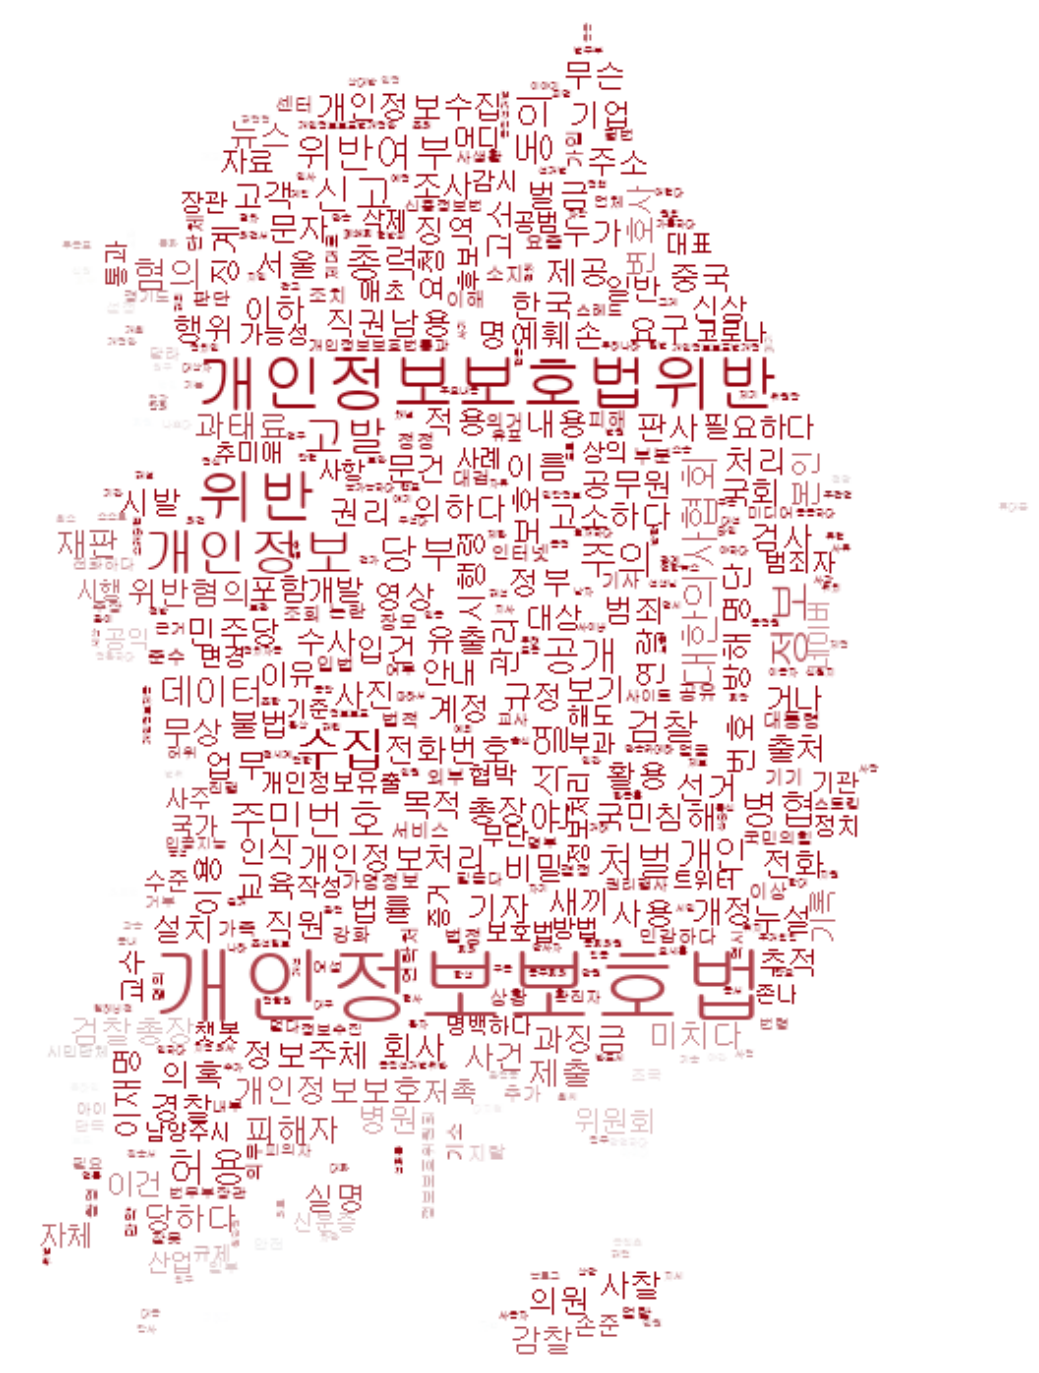

In [20]:
# Importing word cloud
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from PIL import Image

## Creating a masked wordcloud using TD-IDF
fig, ax = plt.subplots(figsize=(25,25))
custom_mask = np.array(Image.open("korea4.jpg"))
w = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
              background_color = 'white',
              width=800,height=600,
              mask = custom_mask,
              mode='RGBA',
              max_words=2000).fit_words(topwords)
image_colors = ImageColorGenerator(custom_mask)
w.recolor(color_func = image_colors)
plt.imshow(w, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('개인정보보호법 twitter_TFIDF_Wordcloud.png', dpi=800)

### LDA

In [21]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]]


In [22]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# mallet_path = 'mallet-2.0.8/bin/mallet'  # update this path
# mallet_path = 'path/to/mallet-2.0.8/bin/mallet' # update this path
import os
os.environ.update({'MALLET_HOME':r'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/'})

mallet_path = 'C:/Users/onrik/Downloads/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path


# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

In [23]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()

[(0,
  [('개인정보보호법위반', 0.1116201582673886),
   ('위반', 0.056851311953352766),
   ('국민', 0.02353186172428155),
   ('범죄', 0.0212411495210329),
   ('처벌', 0.019366930445647648),
   ('행위', 0.016867971678467306),
   ('이용', 0.016034985422740525),
   ('주민번호', 0.014369012911286963),
   ('허용', 0.013536026655560184),
   ('병협', 0.01062057476051645)]),
 (1,
  [('개인정보', 0.07085478887744594),
   ('동의', 0.036457260556127705),
   ('수집', 0.03583934088568486),
   ('개인정보보호법위반', 0.026364572605561278),
   ('정부', 0.019155509783728115),
   ('이하', 0.01812564366632338),
   ('내용', 0.01709577754891864),
   ('중국', 0.011946446961894954),
   ('과태료', 0.01153450051493306),
   ('과징금', 0.01153450051493306)]),
 (2,
  [('개인정보보호법', 0.07759143261264902),
   ('신고', 0.021620529399878765),
   ('번호', 0.015558698727015558),
   ('보기', 0.014346332592442917),
   ('이름', 0.011921600323297636),
   ('개인', 0.011517478278440088),
   ('고소', 0.011517478278440088),
   ('포함', 0.010709234188724995),
   ('당하다', 0.009900990099009901),
   ('개인정보수집

In [24]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [25]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=30, step=2)

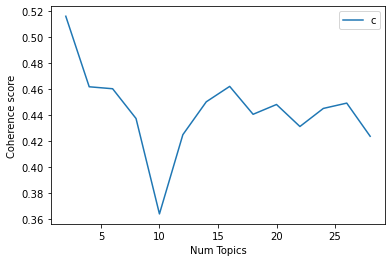

In [26]:
# Show graph
limit=30; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [27]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
model_list

Num Topics = 2  has Coherence Value of 0.5158
Num Topics = 4  has Coherence Value of 0.4616
Num Topics = 6  has Coherence Value of 0.4601
Num Topics = 8  has Coherence Value of 0.4373
Num Topics = 10  has Coherence Value of 0.364
Num Topics = 12  has Coherence Value of 0.4249
Num Topics = 14  has Coherence Value of 0.4501
Num Topics = 16  has Coherence Value of 0.4619
Num Topics = 18  has Coherence Value of 0.4405
Num Topics = 20  has Coherence Value of 0.448
Num Topics = 22  has Coherence Value of 0.4311
Num Topics = 24  has Coherence Value of 0.445
Num Topics = 26  has Coherence Value of 0.4491
Num Topics = 28  has Coherence Value of 0.4236


In [38]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

[(0,
  '0.074*"개인정보보호법" + 0.044*"개인정보" + 0.017*"동의" + 0.013*"데이터" + 0.011*"개인" + '
  '0.009*"정부" + 0.008*"목적" + 0.008*"요구" + 0.007*"기업" + 0.007*"활용" + 0.007*"법률" '
  '+ 0.007*"국회" + 0.006*"정보주체" + 0.006*"주의" + 0.006*"개인정보보호" + 0.006*"영상" + '
  '0.006*"제출" + 0.006*"보호" + 0.006*"위원회" + 0.006*"설치"'),
 (1,
  '0.027*"고발" + 0.026*"개인정보보호법위반" + 0.023*"윤석열" + 0.017*"검찰" + 0.015*"혐의" + '
  '0.014*"수사" + 0.013*"기자" + 0.011*"검사" + 0.011*"의혹" + 0.011*"뉴스" + 0.011*"의원" '
  '+ 0.010*"국민" + 0.010*"위반혐의" + 0.010*"직권남용" + 0.010*"공무원" + 0.009*"경찰" + '
  '0.009*"범죄" + 0.008*"공개" + 0.008*"총장" + 0.008*"사찰"'),
 (2,
  '0.040*"개인정보보호법" + 0.030*"정보" + 0.013*"문건" + 0.012*"유출" + 0.012*"교육" + '
  '0.012*"제공" + 0.009*"이하" + 0.009*"한국" + 0.009*"이용" + 0.008*"사건" + 0.007*"산업" '
  '+ 0.007*"사진" + 0.006*"장모" + 0.006*"관리" + 0.006*"병원" + 0.006*"법정" + '
  '0.005*"포함" + 0.005*"고객" + 0.005*"단독" + 0.005*"직원"'),
 (3,
  '0.041*"개인정보보호법위반" + 0.027*"위반" + 0.024*"개인정보보호법" + 0.017*"수집" + 0.011*"처벌" '
  '+ 0.011*"신고" + 0.011*"공개" +

In [39]:
ldadf = []
for i in range(len(optimal_model.print_topics(num_words= 20))):
    topic = optimal_model.print_topics(num_words= 20)[i]
    topic_num = 'topic' + ' ' + str(i+1)
    for j in range(len(topic[1].split(" + "))):
        term = topic[1].split(" + ")[j].split("*")[1][1:-1]
        ldanum = topic[1].split(" + ")[j].split("*")[0]
        ldadf.append({"topic": topic_num, 'term':term, 'lda_num':ldanum})
ldadf = pd.DataFrame(ldadf)
print(len(ldadf), ldadf.term.nunique())
ldadf

80 76


,topic,term,lda_num
0,topic 1,개인정보보호법,0.074
1,topic 1,개인정보,0.044
2,topic 1,동의,0.017
3,topic 1,데이터,0.013
4,topic 1,개인,0.011
...,...,...,...
75,topic 4,허용,0.007
76,topic 4,문자,0.006
77,topic 4,사용,0.006
78,topic 4,전화번호,0.006


In [41]:
ldadf.to_excel("개인정보보호법 twitter LDAdf_final2.xlsx", index=False)

In [42]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.3030,"개인정보보호법위반, 위반, 개인정보보호법, 수집, 신고, 처벌, 공개, 불법, 변호...",엥우님 개인정보보호법으로 사진도용 유포죄 모욕죄로 고소 가능해요 본인만 고소장작성하...
1,1,0.0,0.3307,"개인정보보호법, 개인정보, 동의, 데이터, 개인, 정부, 목적, 요구, 법률, 기업",“개인정보보호법학회 학술세미나 &lt;데이터 3법의 개정과 향후 입법과제 모색&gt...
2,2,3.0,0.2948,"개인정보보호법위반, 위반, 개인정보보호법, 수집, 신고, 처벌, 공개, 불법, 변호...",일단 5번은 성적인내용이므로 사이버성폭력에 해당되고 5-1번은 협박에 응하지않을시 ...
3,3,0.0,0.3419,"개인정보보호법, 개인정보, 동의, 데이터, 개인, 정부, 목적, 요구, 법률, 기업","6년 전 박근혜 정부의 창조경제정책으로 시도하려 하였으나 실패했던 정책이, 유럽 개..."
4,4,0.0,0.5351,"개인정보보호법, 개인정보, 동의, 데이터, 개인, 정부, 목적, 요구, 법률, 기업","한국의 개인정보보호, 유럽연합 인정 받을까?: 지난달 9일 국회가 개인정보보호법, ..."
5,5,3.0,0.2758,"개인정보보호법위반, 위반, 개인정보보호법, 수집, 신고, 처벌, 공개, 불법, 변호...",https://news.v.daum.net/v/20200205203325630… #...
6,6,0.0,0.2905,"개인정보보호법, 개인정보, 동의, 데이터, 개인, 정부, 목적, 요구, 법률, 기업",#가명정보 #개인정보보호법 #데이터3법 개인정보를 안전하게 처리하여 활용하면 어떤일...
7,7,0.0,0.2960,"개인정보보호법, 개인정보, 동의, 데이터, 개인, 정부, 목적, 요구, 법률, 기업",#가명정보 #개인정보보호법 #데이터3법 개인정보를 안전하게 처리하여 활용하면 어떤일...
8,8,0.0,0.2960,"개인정보보호법, 개인정보, 동의, 데이터, 개인, 정부, 목적, 요구, 법률, 기업",#가명정보 #개인정보보호법 #데이터3법 개인정보를 안전하게 처리하여 활용하면 어떤일...
9,9,3.0,0.2618,"개인정보보호법위반, 위반, 개인정보보호법, 수집, 신고, 처벌, 공개, 불법, 변호...",님에게 보내는 답글 개인정보보호법 걸릴 수 있어 무식한년아 1


In [43]:
df_dominant_topic.to_excel("개인정보보호법 twitter_토픽별docu.xlsx",index=False)

### NER

In [26]:
import spacy
from spacy import displacy
import en_core_web_sm

nlp = en_core_web_sm.load()
def NER(lst):
    doc = nlp(lst)
    NERlst = []
    for X in doc.ents:
    #     NERlst.append((X.text, X.label_))
        if X.label_ == 'ORG':
            NERlst.append(X.text)

    return NERlst
qq =  df

qq['content'] = data_words_nostops
nlpdf = qq[['content']]
de_doc = []
for i in range(len(data_words_nostops)):
    t = ' '.join(data_words_nostops[i])
    de_doc.append(t)
qq['content'] = de_doc
nlpdf = qq[['content']]    
nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))
nlpdf

<ipython-input-26-939e1312cae3>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlpdf['NER result'] = nlpdf['content'].apply(lambda x: NER(x))


,content,NER result
0,france threatened fine facial recognition comp...,"[cnil, american company, european unions, euro..."
1,views opinions expressed article author one co...,"[healthcare, eu health data space, eu health d..."
2,digital technologies transforming way work rap...,"[amazon, harvard business review]"
3,whatsapp rewritten privacy policy european use...,"[detail meta, european union, meta whatsapp, i..."
4,receiving film recommendation favourite video ...,"[edri, netherlands finland commission, axel, e..."
...,...,...
58,eu citizens tracked ad tech companies visit go...,"[eu government, eu, eu citizens]"
59,office thats responsible enforcing european da...,"[ireland data protection commission, federal t..."
60,northern ireland backstop continuing thorn the...,"[congress, un, un, congress, microsoft]"
61,frances regulatory body dealing data privacy f...,"[national commission, eu major new data]"


In [27]:
from nltk.probability import FreqDist
NERll = nlpdf['NER result'].sum()
fdist = FreqDist(NERll)
top_20 = fdist.most_common(20)
top_20

[('european commission', 40),
 ('european union', 27),
 ('congress', 5),
 ('irelands data protection commission', 3),
 ('eu data protection', 3),
 ('european data protection board', 3),
 ('airbus', 3),
 ('wto', 3),
 ('ireland data protection commission', 3),
 ('kremlin', 3),
 ('eu health data space', 2),
 ('amazon', 2),
 ('data protection commission', 2),
 ('max', 2),
 ('eu court', 2),
 ('irish data protection commission', 2),
 ('von der leyen', 2),
 ('android', 2),
 ('eu general data protection', 2),
 ('general data protection', 2)]